In [11]:
# Импорт необходимых библиотек
import pandas as pd
import numpy as np
from scipy import stats
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics
from statsmodels.stats.weightstats import *
import matplotlib.pyplot as plt

%pylab inline

Populating the interactive namespace from numpy and matplotlib


__Задание:__

Имеются данные о стоимости и размерах 53940 бриллиантов:

Отделите 25% случайных наблюдений в тестовую выборку с помощью функции sklearn.cross_validation.train_test_split (random state = 1). На обучающей выборке настройте две регрессионные модели:

1) линейную регрессию с помощью LinearRegression без параметров

2) случайный лес с помощью RandomForestRegressor с random_state=1.

Какая из моделей лучше предсказывает цену бриллиантов? Сделайте предсказания на тестовой выборке, посчитайте модули отклонений предсказаний от истинных цен. Проверьте гипотезу об одинаковом среднем качестве предсказаний, вычислите достигаемый уровень значимости. Отвергается ли гипотеза об одинаковом качестве моделей против двусторонней альтернативы на уровне значимости α=0.05?

Посчитайте 95% доверительный интервал для разности средних абсолютных ошибок предсказаний регрессии и случайного леса.

In [12]:
# Импортируем данные из файла
data=pd.read_csv('diamonds.txt', delimiter='\t')
data.head()

,carat,depth,table,price,x,y,z
0,0.23,61.5,55.0,326,3.95,3.98,2.43
1,0.21,59.8,61.0,326,3.89,3.84,2.31
2,0.23,56.9,65.0,327,4.05,4.07,2.31
3,0.29,62.4,58.0,334,4.20,4.23,2.63
4,0.31,63.3,58.0,335,4.34,4.35,2.75


In [13]:
# Разделим данные на целевую переменную и признаки для обучения
Price=np.ravel(data.price)
Features = data.drop('price', axis=1)

# Разделим выборку на тестовую (25%) и на выборку для обучения
train_data, test_data, train_labels, test_labels = train_test_split(Features, Price, test_size=0.25, random_state=1)

# Далее обучим две регрессионные модели
LR=LinearRegression()
LR.fit(train_data, train_labels)

RF=RandomForestRegressor(random_state=1)
RF.fit(train_data, train_labels)

# Сделаем предсказания и посчитаем абсолютные отклонения предсказаний от истинных цен.

LR_errors=abs(test_labels - LR.predict(test_data))
RF_errors=abs(test_labels - RF.predict(test_data))

print ('Средняя абсолютная ошибка модели LR: {}; \n'
        'Средняя абсолютная ошибка модели RF: {}; \n'.format(mean(LR_errors), mean(RF_errors)))

print '95%% доверительный интервал: [%f, %f]' % DescrStatsW(LR_errors-RF_errors).tconfint_mean()

# Для проверки нулевой гипотезы применим двухвыборочный критерий Стьюдента для зависимых выборок. 
stats.ttest_rel(LR_errors, RF_errors)


Средняя абсолютная ошибка модели LR: 890.376400429; 
Средняя абсолютная ошибка модели RF: 802.920517272; 

95% доверительный интервал: [74.287245, 100.624521]


Ttest_relResult(statistic=13.017729783878472, pvalue=1.6551745751432446e-38)

__Вывод:__ *Достигаемый уровень значимости получился гораздо меньше 0.05, поэтому мы можем отвергнуть нулевую гипотезу об одинаковом среднем качестве предсказаний моделей.
Согласно доверительному интервалу случайный лес предсказывает цены бриллиантов в среднем на 74-100 долларов точнее.*

__Задание:__

По данным опроса, 75% работников ресторанов утверждают, что испытывают на работе существенный стресс, оказывающий негативное влияние на их личную жизнь. Крупная ресторанная сеть опрашивает 100 своих работников, чтобы выяснить, отличается ли уровень стресса работников в их ресторанах от среднего. 67 из 100 работников отметили высокий уровень стресса.

Посчитайте достигаемый уровень значимости, округлите ответ до четырёх знаков после десятичной точки.

In [14]:
# В данном случае нулевое распределение статистики - это биномиальное распределение Bin(n,p), где n - это количество
# работников, а p - вероятность того, что работник ресторана испытывает на работе существенный стресс.
# Чтобы понять отличается ли уровень стресса работников в конкретной ресторанной сети от данных опроса,
# проверим нулевую гипотезу с помощью биномиального теста с двустронней альтернативой.
# H0: Уровень стресса работников в конкретной ресторанной сети соотвествует данным опроса (не отличается от среднего).


p=stats.binom_test(67, 100, 0.75, alternative = 'two-sided')
print 'Достигаемый уровень значимости: %.4f' %p

Достигаемый уровень значимости: 0.0822


__Вывод:__ *С учетом полученного результата, на уровне значимости 0.05 мы не можем отвергнуть нулевую гипотезу. Следовательно у нас нет достаточных оснований отрицать, что уровень стресса работников рассматриваемой ресторанной сети не отличается от среднего.*

__Задание:__

The Wage Tract — заповедник в округе Тома, Джорджия, США, деревья в котором не затронуты деятельностью человека со времён первых поселенцев. Для участка заповедника размером 200х200 м имеется информация о координатах сосен (sn — координата в направлении север-юг, we — в направлении запад-восток, обе от 0 до 200).

Проверим, можно ли пространственное распределение сосен считать равномерным, или они растут кластерами.

Загрузите данные, поделите участок на 5х5 одинаковых квадратов размера 40x40 м, посчитайте количество сосен в каждом квадрате (чтобы получить такой же результат, как у нас, используйте функцию scipy.stats.binned_statistic_2d).

Если сосны действительно растут равномерно, какое среднее ожидаемое количество сосен в каждом квадрате?

Чтобы сравнить распределение сосен с равномерным, посчитайте значение статистики хи-квадрат для полученных 5х5 квадратов.


In [15]:
# Загрузим данные
data=pd.read_csv('pines.txt', delimiter = '\t')
data.head()

,sn,we
0,200.0,8.8
1,199.3,10.0
2,193.6,22.4
3,167.7,35.6
4,183.9,45.4


In [16]:
# Далее поделим участок на квадраты размерами 40 на 40 и посчитаем количество сосен в каждом.
result = stats.binned_statistic_2d(data.sn, data.we, None, 'count', bins=5)
print result.statistic

[[18. 26. 29. 25. 20.]
 [14. 12. 22. 34. 25.]
 [12. 24. 15. 50. 37.]
 [ 8. 19. 31. 50.  7.]
 [ 7.  8. 37. 27. 27.]]


*Получилось 25 квадратов и видно, что количество деревьев сильно варьируется.*

In [17]:
# Преобразуем полученные данные в список.
observed=result.statistic.reshape(1,25)[0].tolist()
print observed

[18.0, 26.0, 29.0, 25.0, 20.0, 14.0, 12.0, 22.0, 34.0, 25.0, 12.0, 24.0, 15.0, 50.0, 37.0, 8.0, 19.0, 31.0, 50.0, 7.0, 7.0, 8.0, 37.0, 27.0, 27.0]


In [18]:
# Посчитаем среднее ожидаемое количество сосен в каждом квадрате при условии, что сосны распределены равномерно. 
# И составим список квадратов со средним ожидаемым количеством сосен.
exp_num = float(len(data))/len(observed)
expected=np.full(len(observed),exp_num).tolist()
print expected

[23.36, 23.36, 23.36, 23.36, 23.36, 23.36, 23.36, 23.36, 23.36, 23.36, 23.36, 23.36, 23.36, 23.36, 23.36, 23.36, 23.36, 23.36, 23.36, 23.36, 23.36, 23.36, 23.36, 23.36, 23.36]


In [19]:
# Для проверки соответствует ли наблюдаемое распределение сосен равномерному, воспользуемся критерием согласия Пирсона.
# H0: рассматриваемая величина имеет равномерное распределение.
stats.chisquare(observed, expected, ddof = 0)

Power_divergenceResult(statistic=150.58904109589042, pvalue=2.574669774967279e-20)

*__Вывод:__ Значение p-value мало (значительно меньше уровня значимости 0.05) и мы можем отвергнуть нулевую гипотезу, и сосны распределены в заповеднике неравномерно.*

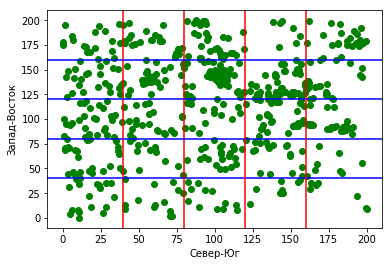

In [20]:
# Посмотрим какие получились границы квадратов при применении stats.binned_statistic_2d 
# и отобразим их и деревья на графике.

plt.scatter(data['sn'], data['we'], c='green')
plt.xlabel(u'Север-Юг')
plt.ylabel(u'Запад-Восток')

for i in range(1,len(result.x_edge)-1):
    plt.axvline(result.x_edge[i], color='r')
    plt.axhline(result.y_edge[i], color='b')
plt.show()